In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append(os.path.abspath('../../'))

In [3]:
import data_loading as dl
import numpy as np


RUN = ["5"]

rundata, mc_weights, data_pot = dl.load_runs(
    RUN,
    data="bdt_sideband",
    truth_filtered_sets=["drt"],
    blinded=False,
    numupresel=False,
    use_bdt=True,
    loadnumuvariables=True,
    loadshowervariables=True,
    loadsystematics=True,
    loadpi0variables=True
)

/Users/trettin/miniconda/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/trettin/software/SBND/PELEE/data_loading.py:1078: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
/Users/trettin/software/SBND/PELEE/data_loading.py:1078: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
/Users/trettin/software/SBND/PELEE/data_loading.py:594: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/Users/trettin/software/SBND/PELEE/data_loading.py:594: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/Users/trettin/miniconda/envs/python3LE

In [4]:
rundata["drt"]["weightsReint"]

entry
0      [1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...
1      [1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...
2      [1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...
3      [1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...
4      [1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...
                             ...                        
407    [1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...
408    [1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...
409    [1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...
410    [1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...
411    [1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...
Name: weightsReint, Length: 410, dtype: object

In [6]:
from microfit import histogram as hist
from microfit import run_plotter as rp

selection = "NPL"
preselection = "NP"
# binning_def = ("reco_e", 17, (0.01, 2.39), r"Reconstructed Energy [ GeV ]")
binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")  # reproduce technote
binning = hist.Binning.from_config(*binning_def)
signal_generator = hist.RunHistGenerator(
    rundata,
    binning,
    data_pot=data_pot,
    selection=selection,
    preselection=preselection,
    uncertainty_defaults=None,
)
plotter = rp.RunHistPlotter(signal_generator, selection_title=None)
plotter.title = plotter.get_selection_title(selection=selection, preselection=preselection)

<AxesSubplot:title={'center':'1eNp Presel. and 1eNp Loose cuts'}, xlabel='Reconstructed Energy [GeV]', ylabel='Events'>

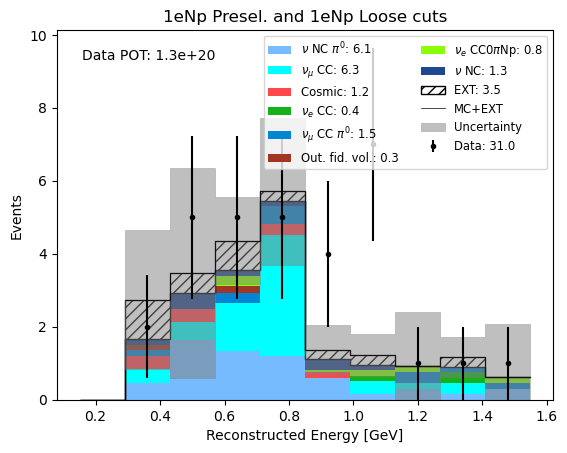

In [7]:
plotter.plot(category_column="category", include_multisim_errors=True)